In [1]:

import numpy as np
from tqdm import tqdm
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Flatten,Conv2D
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential

In [3]:
import tensorflow as tf

In [2]:
TRAIN_DIR='train'
TEST_DIR='test'

In [3]:
def load_data(dir_path,IMG_SIZE):
    X=[]
    Y=[]
    i=0
    labels=dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i]=path
            for file in os.listdir(dir_path+'/'+path):
                if not file.startswith('.'):
                    img=cv.imread(dir_path+'/'+path+'/'+file)
                    img=img.astype('float32')/255
                    resized=cv.resize(img,IMG_SIZE,interpolation = cv.INTER_AREA)
                    X.append(resized)
                    Y.append(i)
            i+=1
    
    X=np.array(X)
    Y=np.array(Y)
    print(f'{len(X)} images loaded from {dir_path}')
    return X,Y,labels
                    

In [4]:
IMG_SIZE=(128,128)

In [ ]:
X_train,Y_train,train_labels=load_data(TRAIN_DIR,IMG_SIZE) # loading Training Dataset 

In [ ]:
train_labels

In [5]:
X_test,y_test,test_labels=load_data(TEST_DIR,IMG_SIZE) # Loading Testing Dataset
print(y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:32<00:00,  4.66s/it]


7066 images loaded from test
[0 0 0 ... 6 6 6]


In [10]:
def plot_samples(X, y, labels_dict, n=50): # Randomly Generating Plots from the dataset
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

In [ ]:
plot_samples(X_train,Y_train,train_labels,10)

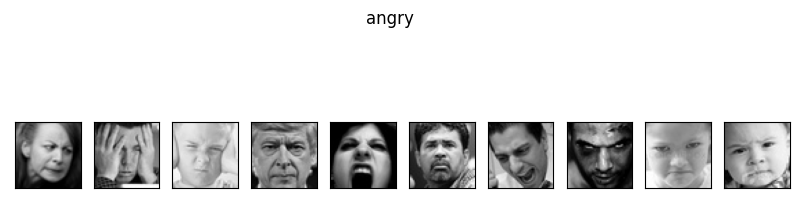

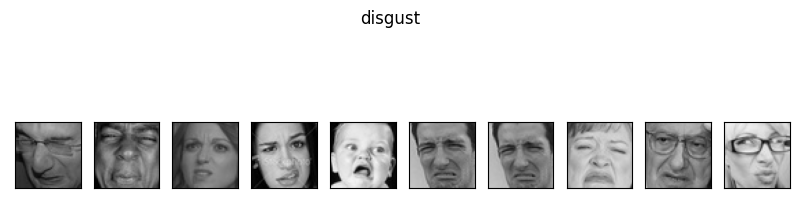

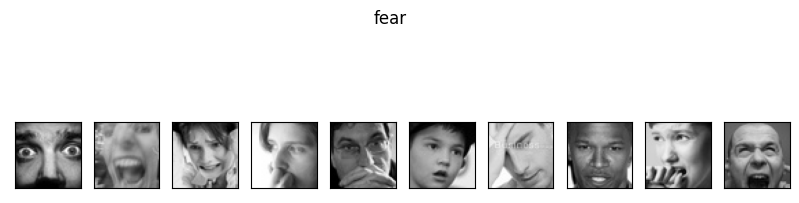

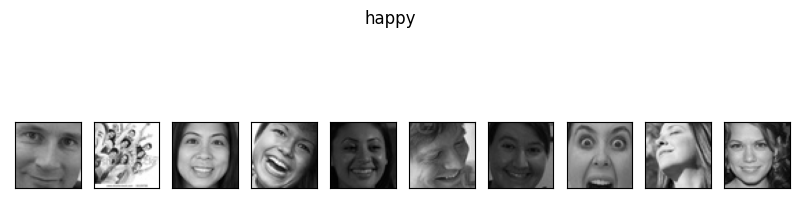

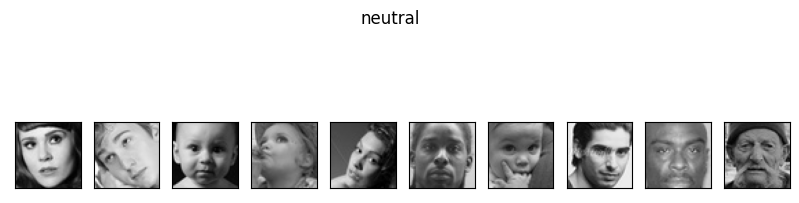

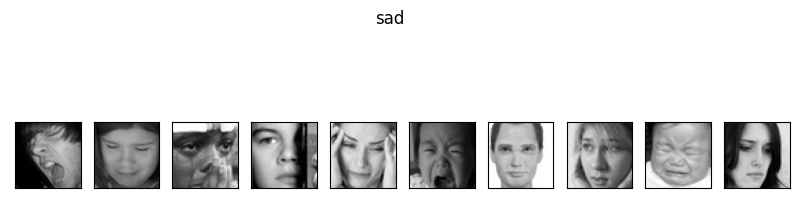

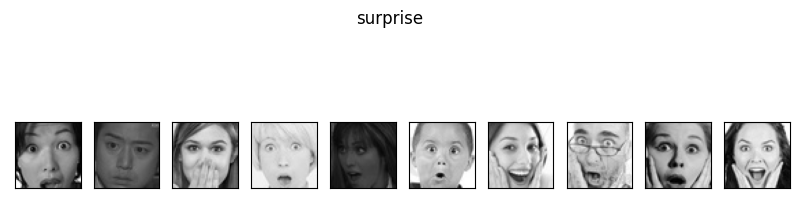

In [11]:
plot_samples(X_test,y_test,test_labels,10)

In [8]:
from keras.utils.np_utils import to_categorical


In [11]:
Y_train=to_categorical(Y_train,num_classes=7)
Y_train.shape

NameError: name 'Y_train' is not defined

In [9]:
Y_test=to_categorical(y_test,num_classes=8)
Y_test.shape

(7066, 8)

In [13]:
print(Y_train[:5])

NameError: name 'Y_train' is not defined

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

In [ ]:

EPOCHS = 150
BS = 128
DROPOUT_RATE = 0.3
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001

In [ ]:
#Custom Model used for Facial Expression Recognition
model7 = Sequential()
model7.add(BatchNormalization(input_shape=(128,128,3)))
model7.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(128,128,3),name="conv1"))
model7.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2),name="maxpool1"))
model7.add(Dropout(0.2))
model7.add(Conv2D(32, (3, 3), activation='relu',padding='same',name="conv2"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2),name="maxpool2"))         
model7.add(Dropout(0.2))
model7.add(Conv2D(64, (3, 3), activation='relu',padding='same',name="conv3"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2),name="maxpool3"))
model7.add(Dropout(0.2))
model7.add(Conv2D(64, (3, 3), activation='relu',padding='same',name="conv4"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2),name="maxpool4"))
model7.add(Dropout(0.2))
model7.add(Flatten())
model7.add(Dense(1024, activation='relu',name='fc1'))
model7.add(Dropout(DROPOUT_RATE))
model7.add(BatchNormalization())
model7.add(Dense(7, activation='softmax',name='fcsoftmax'))

In [ ]:
#TODO: weight decay of 0.0001...initial learning rate is set to 0.01 and reduced by a factor of 2 at every 25 epoch
sgd = SGD(learning_rate=SGD_LEARNING_RATE,momentum=0.9, decay=SGD_DECAY, nesterov=True)
model7.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model7=tf.keras.models.load_model('best_model(3).h5')

In [ ]:
history=model7.fit(X_train,Y_train,epochs=20,shuffle=True)

In [ ]:
model7.save('best_model(3).h5')

In [12]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [13]:
model7=tf.keras.models.load_model('Face_Model (1).h5')

221/221 [==============================] - 31s 141ms/step
Test Accuracy =0.59


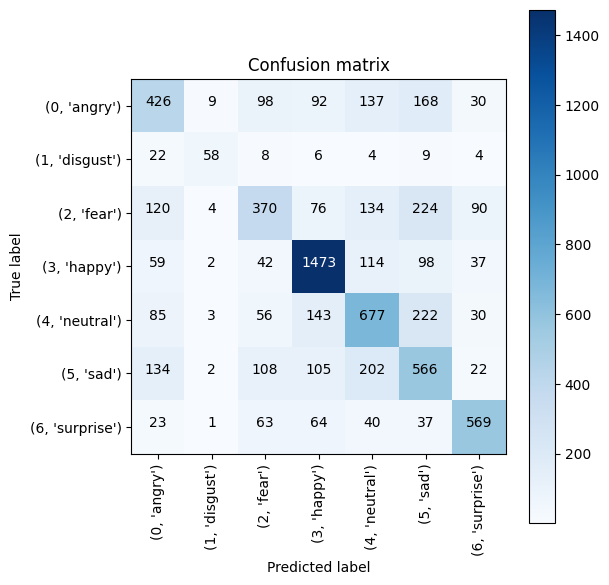

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix
#Validations on test set
predictions=model7.predict(X_test)
y_pred=[np.argmax(probas) for probas in predictions]

accuracy=accuracy_score(y_test,y_pred)
print('Test Accuracy =%.2f' % accuracy)
confusion_mtx=confusion_matrix(y_test,y_pred)
cm=plot_confusion_matrix(confusion_mtx,classes=list(test_labels.items()),normalize=False)

In [16]:
batch_size=64
from keras.preprocessing.image import ImageDataGenerator
datagen_test=ImageDataGenerator(rescale=1./255)
pred_generator=datagen_test.flow_from_directory(TEST_DIR,
                                                 target_size = (48,48),
                                                 color_mode = "grayscale",
                                                 batch_size = batch_size,
                                                 class_mode = "categorical",
                                                 shuffle=False)

Found 7066 images belonging to 7 classes.


In [18]:
new_predictions=model7.predict(X_test)
y_pred=[np.argmax(probas) for probas in new_predictions]
y_pred=[test_labels[k] for k in y_pred]

221/221 [==============================] - 31s 139ms/step


In [19]:
filenames=pred_generator.filenames
actual_class=[test_labels[h] for h in pred_generator.classes]

In [20]:
import pandas as pd
pred_result = pd.DataFrame({"Filename":filenames,
                           "Predictions":y_pred,
                           "Actual Values":actual_class})

pred_result.head()

,Filename,Predictions,Actual Values
0,angry\10052.jpg,happy,angry
1,angry\10065.jpg,sad,angry
2,angry\10079.jpg,angry,angry
3,angry\10095.jpg,sad,angry
4,angry\10121.jpg,angry,angry


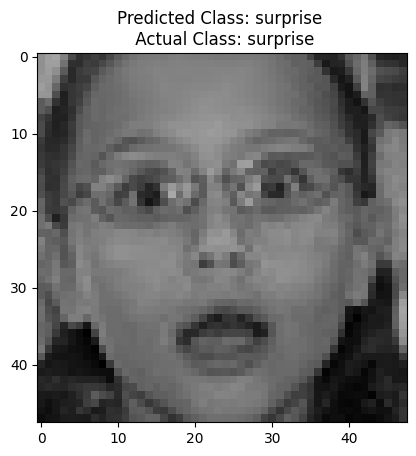

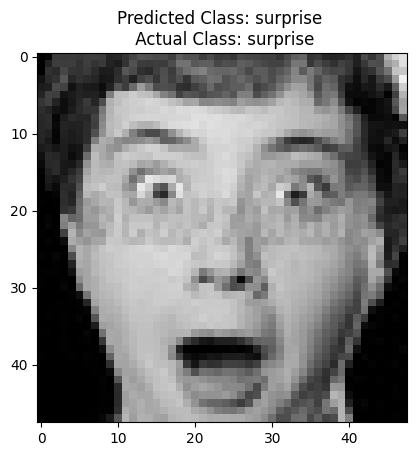

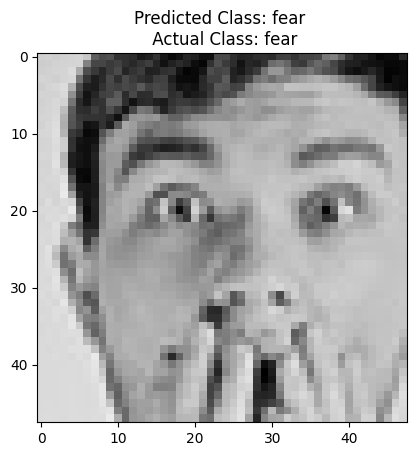

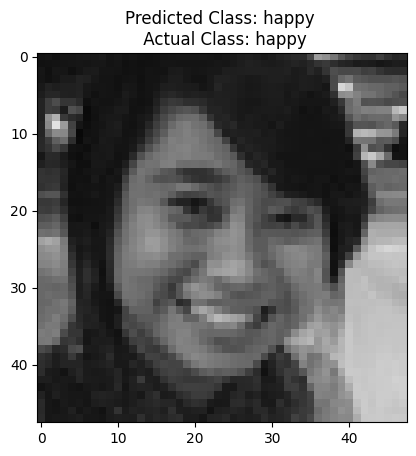

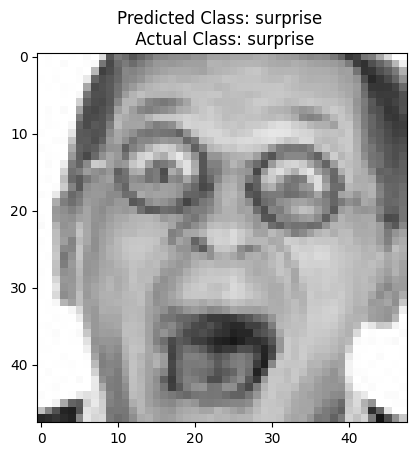

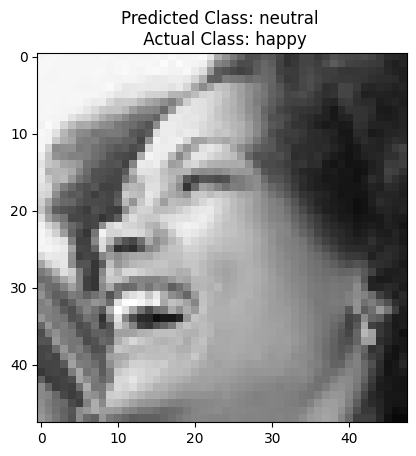

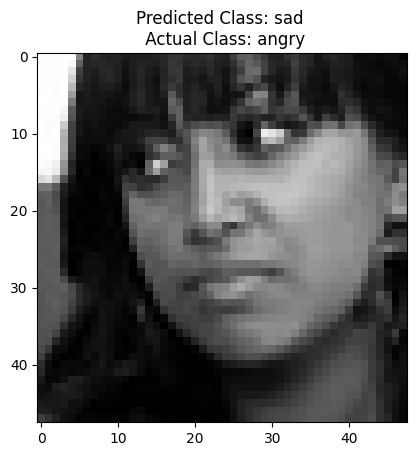

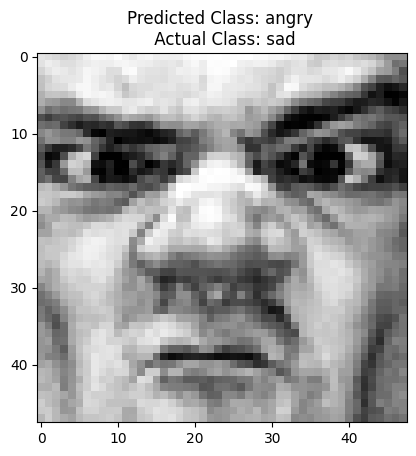

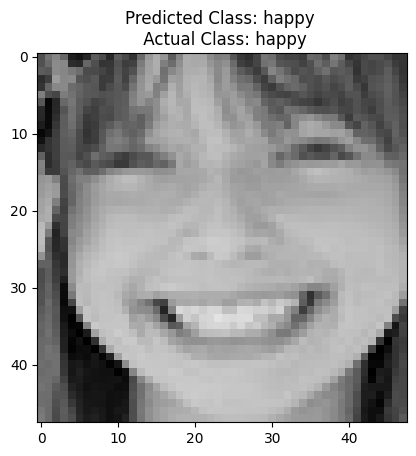

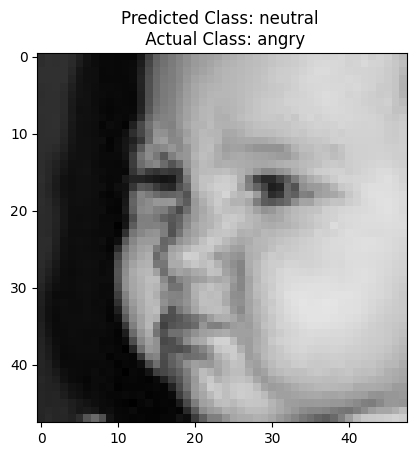

In [21]:
from random import randint

l = len(filenames)
base_path = TEST_DIR
for i in range(10):  # 10 images
    
    rnd_number = randint(0,l-1)
    filename,pred_class,actual_class = pred_result.loc[rnd_number]
    
    img_path = os.path.join(base_path,filename)
    img = cv.imread(img_path)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Predicted Class: {} {} Actual Class: {}".format(pred_class,'\n',actual_class))
    plt.show()
    pass